In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras import optimizers
import numpy as np
import theano
import tensorflow

In [35]:
np.random.seed(123) 
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

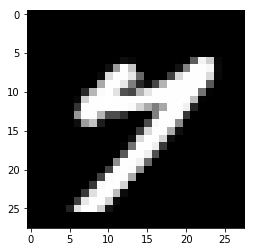

In [36]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1001],cmap="gray")
plt.show()

In [37]:
print X_train.shape

(60000, 28, 28)


In [38]:
X_train=X_train.reshape(X_train.shape[0],1,28,28)
X_test=X_test.reshape(X_test.shape[0],1,28,28)

In [39]:
X_train.shape

(60000, 1, 28, 28)

In [40]:
X_test.shape

(10000, 1, 28, 28)

In [41]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [42]:
Y_train = np_utils.to_categorical(y_train, 10) #Convert training  data into 10 classes vector
Y_test = np_utils.to_categorical(y_test, 10)

In [43]:
Y_train.shape


(60000, 10)

In [44]:
'''Here the activation function is relu as we want output to be zero and one and border mode to same as we want same size 
and filter to go out bound'''
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu',border_mode='same',input_shape=(1,28,28)))
print model.output_shape
model.add(Convolution2D(32, 3, 3,border_mode='same',activation='relu'))
#wee=model.get_weights()
#model.add(Activation='relu')
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))
model.add(Dropout(0.25))
#print wee
#model.add(Conv2D(32,(3, 3),activation='relu',strides=(1, 1),padding='valid', data_format=None, dilation_rate=(1, 1),use_bias=False,kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None,input_shape=(1,28,28)))

#model.output_shape


(None, 1, 28, 32)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(1, 28, 28...)`
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
  


In [45]:
model.add(Convolution2D(32, 3, 3, activation='relu',border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25)) #Dropout reposible for oviding overfittring

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
  """Entry point for launching an IPython kernel.


In [46]:
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [47]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [20]:
model.fit(X_train, Y_train,batch_size=32, epochs=10,sample_weight=None,verbose=1,validation_data=None,shuffle=True,initial_epoch=0)
score = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
60000/60000 [==============================] - 15s - loss: 0.5911 - acc: 0.8067    
Epoch 2/10
60000/60000 [==============================] - 14s - loss: 0.2154 - acc: 0.9368    
Epoch 3/10
60000/60000 [==============================] - 15s - loss: 0.1705 - acc: 0.9504    
Epoch 4/10
60000/60000 [==============================] - 15s - loss: 0.1452 - acc: 0.9569    
Epoch 5/10
60000/60000 [==============================] - 15s - loss: 0.1319 - acc: 0.9617    
Epoch 6/10
60000/60000 [==============================] - 15s - loss: 0.1230 - acc: 0.9642    
Epoch 7/10
60000/60000 [==============================] - 16s - loss: 0.1167 - acc: 0.9667    
Epoch 8/10
60000/60000 [==============================] - 16s - loss: 0.1050 - acc: 0.9682    
Epoch 9/10
60000/60000 [==============================] - 16s - loss: 0.1026 - acc: 0.9700    
Epoch 10/10
60000/60000 [==============================] - 16s - loss: 0.0992 - acc: 0.9708    
